# Rapport TP Data Minig

#### On importe les différents bibliothéques. 

In [235]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import itertools
%matplotlib inline 

In [230]:
def scale_plot_size(factor=1.5):
    import matplotlib as mpl
    default_dpi = mpl.rcParamsDefault['figure.dpi']
    mpl.rcParams['figure.dpi'] = default_dpi*factor
scale_plot_size(1.5)

#### On charge le dataset 'iris'

In [80]:
from sklearn.datasets import load_iris

In [81]:
iris_data = load_iris()

In [82]:
iris_data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [83]:
iris_data["feature_names"]

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [112]:
class_names = iris_data["target_names"]

In [85]:
features = iris_data["data"]

In [86]:
features = pd.DataFrame(features, columns=iris_data["feature_names"])

In [87]:
features.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [88]:
labels = iris_data["target"]

In [89]:
features.size, features.shape

(600, (150, 4))

### ** Vérifier si une des colonnes contient une valeur nulle **

In [90]:
features.isnull().any() 

sepal length (cm)    False
sepal width (cm)     False
petal length (cm)    False
petal width (cm)     False
dtype: bool

### **Vérifier si une des lignes contient une valeur nulle**

In [91]:
features.isnull().any(axis=1).head()

0    False
1    False
2    False
3    False
4    False
dtype: bool

In [231]:
from sklearn.cross_validation import train_test_split

#### On divise le dataset en 2 parties : Training et Testing 

In [93]:
 X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.33, random_state=42)

In [94]:
features.shape, labels.shape

((150, 4), (150,))

In [96]:
X_train.shape,  y_train.size

((100, 4), 100)

In [97]:
X_test.shape, y_test.size

((50, 4), 50)

# **Naive Bayes**

In [98]:
from sklearn.naive_bayes import GaussianNB

In [100]:
classifier_nb = GaussianNB()

In [101]:
classifier_nb.fit(X_train, y_train)

GaussianNB(priors=None)

In [102]:
predictions = classifier_nb.predict(X_test)

In [103]:
predictions

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 2, 2, 1, 1, 2, 0, 2, 0,
       2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0, 0, 1,
       1, 2, 1, 2])

In [104]:
y_test

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2, 0,
       2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0, 0, 1,
       2, 2, 1, 2])

In [105]:
print("Le nombre des cas incorrects est : %d " % (predictions != y_test).sum())

Le nombre des cas incorrects est : 2 


In [106]:
from sklearn.metrics import confusion_matrix, accuracy_score

## La matrice de confusion

In [107]:
confusion_matrix_classifier_naive_bayes = confusion_matrix(y_test, predictions)
confusion_matrix_classifier_naive_bayes

array([[19,  0,  0],
       [ 0, 14,  1],
       [ 0,  1, 15]])

Confusion matrix, without normalization
[[19  0  0]
 [ 0 14  1]
 [ 0  1 15]]


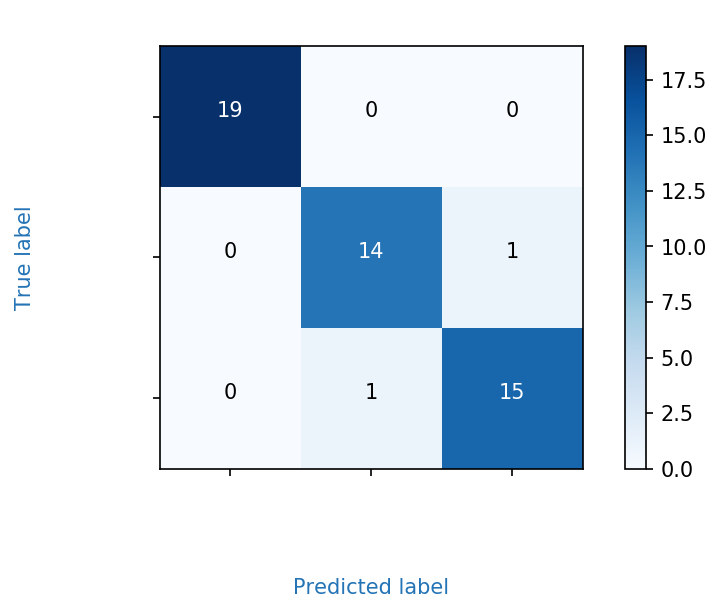

In [183]:
plot_confusion_matrix(confusion_matrix_classifier_naive_bayes, classes=class_names, 
                      title='matrice de confusion')

In [224]:
getAccuracy("Naive Bayes", accuracy_score(y_test, predictions))  

La précision du modéle Naive Bayes est : 0.96 (96.0%)


In [237]:
# Fonction qui aide à l'affichage de la matrice de confusion
%load /home/neo/Bureau/vI-Workspace/python/plot_confusion_matrix.py

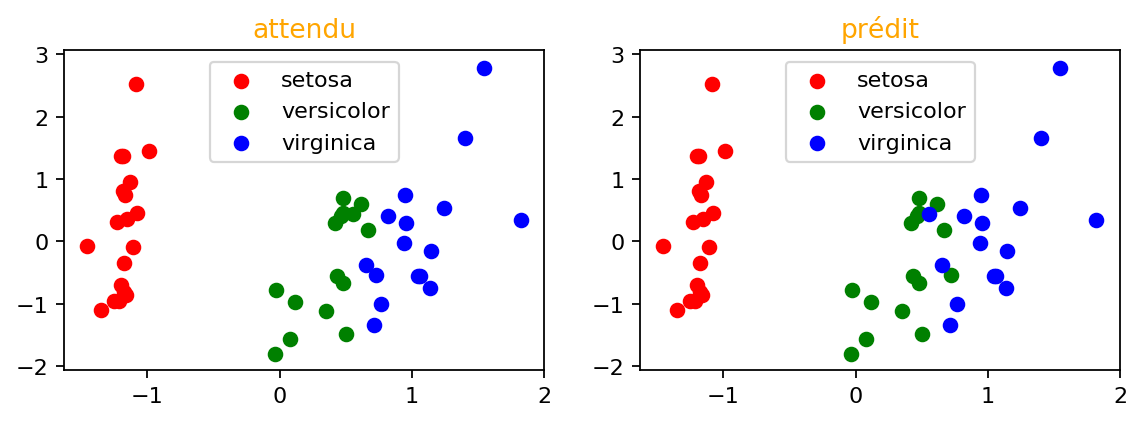

In [238]:
scale_plot_size(1.6)
colors = itertools.cycle('rgb')
fig = plt.figure()
axes_nb = fig.add_axes([0,0,0.5,0.5])
target_ids = range(len(iris_data.target_names))
for i, c, label in zip(target_ids, colors, iris_data.target_names):
    axes_nb.scatter(features_pca[y_test == i, 0], features_pca[y_test == i, 1],
        c=c, label=label)

axes_nb.set_title("attendu", color="orange")
axes_nb.legend()

axes1_nb = fig.add_axes([0.6,0,0.5,0.5])

for i, c, label in zip(target_ids, colors, iris_data.target_names):
    axes1_nb.scatter(features_test_pca[predictions == i, 0], features_test_pca[predictions == i, 1],
        c=c, label=label)

axes1_nb.set_title("prédit", color="orange")
axes1_nb.legend()



In [177]:
def getAccuracy(model, score):
    print("La précision du modéle {} est : {} ({}%)".format(model, score, score * 100 ))  

In [181]:
%load /home/neo/Bureau/

# **Support Vector Machine**

In [158]:
from sklearn.svm import SVC

In [162]:
classifier_svc = SVC() 

In [163]:
classifier_svc.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [170]:
predictsions_svc = classifier_svc.predict(X_test)
predictsions_svc

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2, 0,
       2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0, 0, 1,
       2, 2, 1, 2])

In [172]:
confusion_mx_svc = confusion_matrix(y_test, predictsions_svc)
confusion_mx_svc

array([[19,  0,  0],
       [ 0, 15,  0],
       [ 0,  0, 16]])

Confusion matrix, without normalization
[[19  0  0]
 [ 0 15  0]
 [ 0  0 16]]


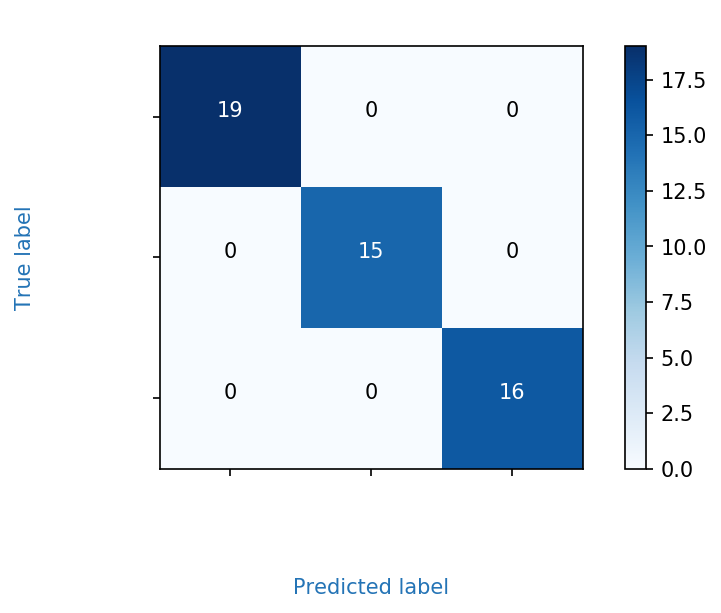

In [182]:
plot_confusion_matrix(confusion_mx_svc,classes=class_names, title='Matrice de confusion' )

In [180]:
getAccuracy("SVM", accuracy_score(y_test, predictsions_svc))

La précision du modéle SVM est : 1.0 (100.0%)


In [211]:
from sklearn.decomposition import PCA

In [215]:
pca = PCA(n_components=2, whiten=True).fit(X_test)

In [216]:
features_pca = pca.transform(X_test)

In [206]:
pca_test = PCA(n_components=2, whiten=True).fit(X_test)
features_test_pca = pca_test.transform(X_test)

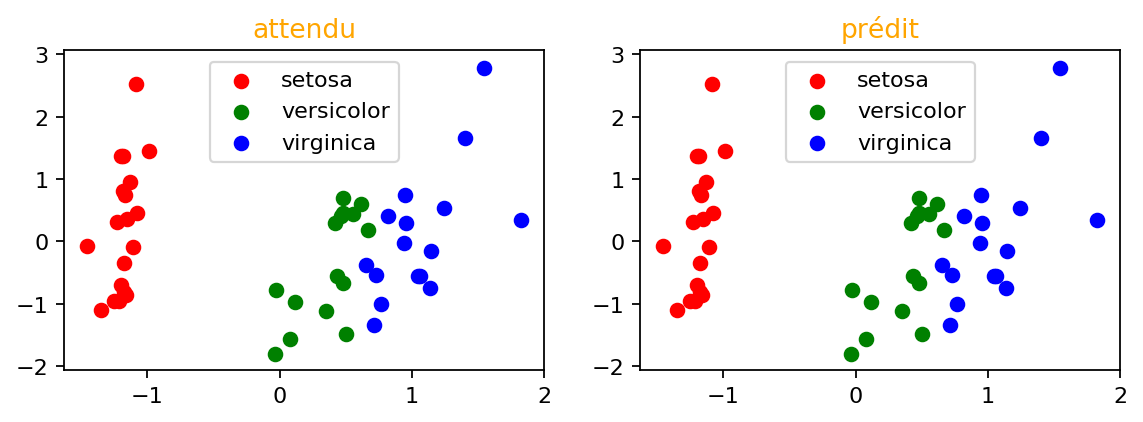

In [228]:
scale_plot_size(1.6)
colors = itertools.cycle('rgb')
fig = plt.figure()
axes = fig.add_axes([0,0,0.5,0.5])
target_ids = range(len(iris_data.target_names))
for i, c, label in zip(target_ids, colors, iris_data.target_names):
    axes.scatter(features_pca[y_test == i, 0], features_pca[y_test == i, 1],
        c=c, label=label)
axes.legend()
axes.set_title("attendu", color="orange")

axes1 = fig.add_axes([0.6,0,0.5,0.5])

for i, c, label in zip(target_ids, colors, iris_data.target_names):
    axes1.scatter(features_test_pca[predictsions_svc == i, 0], features_test_pca[predictsions_svc == i, 1],
        c=c, label=label)
axes1.set_title("prédit", color="orange")
axes1.legend()